# Apply the battery to our data and calculate the cost with and without battery (and logic)

## Ready the dataset
Imports

In [1]:
# Load peak hour price data and meter-id data
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import seaborn as sns
from ast import literal_eval
# Import battery class 
from battery import Battery, Battery2

Load data

In [2]:
# Load production and consumption for the cleaned meters 
df_prod = pd.read_csv("data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED-PROD.csv")
df_cons = pd.read_csv("data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD-COVERAGE100-NORMALIZED-CONS.csv")

# Load json file hour_lookup_price.json
with open('data/hour_lookup_price_dict.json') as json_file:
    hour_lookup_price = json.load(json_file)


Define get series function

In [3]:
def get_series(meter_id, type="prod", start=None, end=None, agg=None):
    """Create Series from meter_id and type of data

    Args:
        meter_id (str): meter-id
        type (str, optional): production or consumption of kwh. Defaults to "prod".
        start (str, optional): timeslot to start series. Defaults to None.
        end (str, optional): timeslot to end series. Defaults to None.
        agg (str, optional): aggregation of data. One of day, week or month. Defaults to None.

    Returns:
        pd.series: series of filtered data
    """

    print("Getting series for meter_id: {}".format(meter_id))

    # if start not none
    if start is not None:
        # Convert to datetime
        start = pd.to_datetime(start)
    
    # if end not none
    if end is not None:
        # Convert to datetime
        end = pd.to_datetime(end)

    if type == "prod":
        df_return = df_prod[df_prod["meter_id"] == meter_id]
        # Drop all columns but timeslot and num_kwh_normalized
        df_return = df_return[['timeslot', 'num_kwh']]
        # Set index to timeslot
        # Filter on start and end
        # Convert timeslot to datetime
        df_return["timeslot"] = pd.to_datetime(df_return["timeslot"], utc=True)
        if start is not None and end is not None:
            print("Filtering on start and end: ", start, end)
            try:
                df_return = df_return[(df_return['timeslot'] >= start) & (df_return['timeslot'] <= end)]
            except Exception as e:
                print(e)
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                print("Format for input end: ", end)
                pass
        elif start is not None:
            print("Filtering on start: ", start)
            try:
                df_return = df_return[(df_return['timeslot'] >= start)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                pass
        elif end is not None:
            print("Filtering on end: ", end)
            try:
                df_return = df_return[(df_return['timeslot'] <= end)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input end: ", end)
                pass

    elif type == "cons":
        df_return = df_cons[df_cons["meter_id"] == meter_id]
        # Drop all columns but timeslot and num_kwh_normalized
        df_return = df_return[['timeslot', 'num_kwh']]
        # Set index to timeslot
        # Filter on start and end
        # Convert timeslot to datetime
        df_return["timeslot"] = pd.to_datetime(df_return["timeslot"], utc=True)
        if start is not None and end is not None:
            print("Filtering on start and end: ", start, end)
            try:
                df_return = df_return[(df_return['timeslot'] >= start) & (df_return['timeslot'] <= end)]
            except Exception as e:
                print(e)
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                print("Format for input end: ", end)
                pass
        elif start is not None:
            print("Filtering on start: ", start)
            try:
                df_return = df_return[(df_return['timeslot'] >= start)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input start: ", start)
                pass
        elif end is not None:
            print("Filtering on end: ", end)
            try:
                df_return = df_return[(df_return['timeslot'] <= end)]
            except:
                print("No data for this timeslot, timeslot might be incorrect format or out of range:")
                print("Format and range for timeslot: ", df_return.index[0], " ", df_return.index[-1])
                print("Format for input end: ", end)
                pass

    df_return = df_return.set_index("timeslot").sort_index()

    # If agg is not none
    if agg is not None:
        if agg == "day":
            df_return = df_return.resample("D").sum()
        elif agg == "week":
            df_return = df_return.resample("W").sum()
        elif agg == "month":
            df_return = df_return.resample("M").sum()
        else:
            print("Aggregation not supported")
            return None

    # Return series
    return df_return

Extract specific meter from data

In [4]:
# Choose the meter id with the most observations
# meter_id = "28ba7f57-6e83-4341-8078-232c1639e4e3"
# meter_id = "d0e900eb-23ec-4449-8d92-4ddb4da657ee"
meter_id = "e882f9a7-f1de-4419-9869-7339be303281"

series_prod = get_series(meter_id, "prod", start="2016-09-04 22:00:00+00:00", end = "2019-05-14 21:00:00+00:00")
series_cons = get_series(meter_id, "cons", start="2016-09-04 22:00:00+00:00", end = "2019-05-14 21:00:00+00:00")

Getting series for meter_id: e882f9a7-f1de-4419-9869-7339be303281
Filtering on start and end:  2016-09-04 22:00:00+00:00 2019-05-14 21:00:00+00:00
Getting series for meter_id: e882f9a7-f1de-4419-9869-7339be303281
Filtering on start and end:  2016-09-04 22:00:00+00:00 2019-05-14 21:00:00+00:00


Merge consumption and production into one dataset

In [5]:
# Merge series
series_merge = pd.merge(series_prod, series_cons, how="outer", left_index=True, right_index=True)
# Rename num_kwh_normalized_x and num_kwh_normalized_y
series_merge.columns = ["num_kwh_prod", "num_kwh_cons"]

# Add column called power_yield with the difference between prod and cons
series_merge["power_yield"] = series_merge["num_kwh_prod"] - series_merge["num_kwh_cons"]
# add column current index as timeslot and reset index
series_merge["timeslot"] = series_merge.index
series_merge = series_merge.reset_index(drop=True)

series_merge.head()

,num_kwh_prod,num_kwh_cons,power_yield,timeslot
0,0.0,1.0,-1.0,2016-11-14 23:00:00+00:00
1,0.0,3.0,-3.0,2016-11-15 00:00:00+00:00
2,0.0,2.0,-2.0,2016-11-15 01:00:00+00:00
3,0.0,2.0,-2.0,2016-11-15 02:00:00+00:00
4,0.0,1.0,-1.0,2016-11-15 03:00:00+00:00


Calculate the sum of consumption and production and the number of panels connected to the meter

In [6]:
print("Summed production: ", series_merge[series_merge["power_yield"] > 0]["power_yield"].sum())
print("Summed consumption: ", series_merge[series_merge["power_yield"] < 0]["power_yield"].sum())

print()
print("Number of panels for meter: ", df_prod[df_prod["meter_id"] == meter_id]["num_panels"].iloc[0])

Summed production:  9783.587
Summed consumption:  -45332.447

Number of panels for meter:  43.0


## Plot
Define moving average function

In [7]:
def moving_average(timeseries, window):
    """Calculate the moving average of a timeseries.

    Args:
        timeseries (pd.Series): timeseries
        window (int): Window size

    Returns:
        pd.Series: Smoothened timeseries
    """
    return timeseries.rolling(window=window, center=True).mean()

Calculate moving average

In [8]:
window_size = 24*31

series_merge["num_kwh_cons_ma"] = moving_average(series_merge["num_kwh_cons"], window=window_size)
series_merge["num_kwh_prod_ma"] = moving_average(series_merge["num_kwh_prod"], window=window_size)

Plot consumption and production

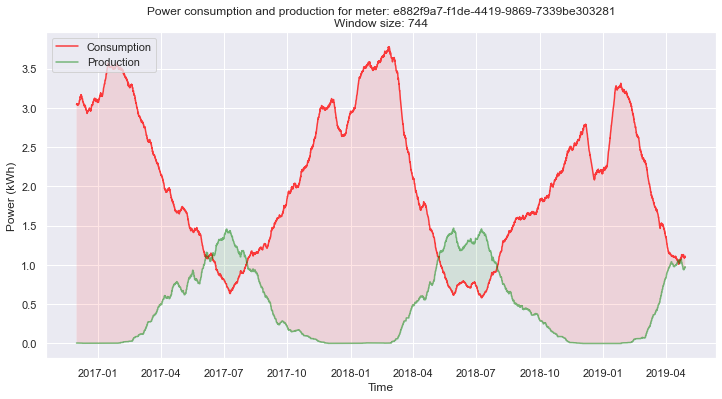

In [9]:
# num_kwh_cons_ma = moving_average(series_merge["num_kwh_cons"], window=24)
sns.set()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_merge["timeslot"], series_merge["num_kwh_cons_ma"], label="Consumption", color="red", alpha=0.75)
ax.plot(series_merge["timeslot"], series_merge["num_kwh_prod_ma"], label="Production", color="green", alpha=0.5)
# ax.plot(series_battery["timeslot"], series_battery["surplus_deficit"], label="Surplus Deficit", alpha=0.75)
# show legend
ax.legend(loc="upper left")

# Fill between positive
# ax.fill_between(series_merge["timeslot"], 0, series_merge["num_kwh_cons_ma"], where=series_merge["num_kwh_cons_ma"] >= 0, facecolor="green", alpha=0.5)
ax.fill_between(series_merge["timeslot"], series_merge["num_kwh_cons_ma"], series_merge["num_kwh_prod_ma"], where=series_merge["num_kwh_prod_ma"]>series_merge["num_kwh_cons_ma"], facecolor='green', alpha=0.1)
ax.fill_between(series_merge["timeslot"], series_merge["num_kwh_cons_ma"], series_merge["num_kwh_prod_ma"], where=series_merge["num_kwh_prod_ma"]<series_merge["num_kwh_cons_ma"], facecolor='red', alpha=0.1)

# x-axis label
ax.set_xlabel("Time")
# y-axis label
ax.set_ylabel("Power (kWh)")

# plot title    
ax.set_title("Power consumption and production for meter: " + meter_id + "\nWindow size: " + str(window_size))

plt.savefig("figures/results/prod-cons-plot.png")

plt.show()

## Battery logic rollout
Define peak hours

In [10]:
# Define peak hours 
peak_hours = list(range(8,20))

Define logic/policy rollout, price, and price summary functions

In [11]:
# Load json file hour_lookup_price.json
with open('data/nordpool_hour_lookup_price_dict.json') as json_file:
    hour_lookup_price = json.load(json_file)

def logic_rollout(series_battery, battery, logic, get_price):
    """Battery logic rollout

    Args:
        series_battery (DataFrame): time series of battery
        battery (object): Battery object 
        logic (funct): Logic function applied to the row
        get_price (funct): Get price function

    Returns:
        DataFrame: Time series datafram with applied logic and price
    """
    series_battery = series_battery.apply(lambda row: logic(row, battery), axis=1)
    series_battery["price"] = series_battery.apply(lambda row: get_price(row["surplus_deficit"], row["timeslot"]), axis=1)
    series_battery["price_cummulative"] = series_battery["price"].cumsum(axis=0)
    return series_battery


# Definge get price function   
def get_price(demand, timestamp):
    """Get price function

    Args:
        demand (float): Power demand
        hour (int): Hour of the day to make price lookup

    Returns:
        float: Price 
    """

    # Update hour_lookup_price by multiplying peak_hours by 8
    # for key, value in hour_lookup_price.items():
    #     if int(key) in peak_hours:
    #         hour_lookup_price[key] = value * 1.8

    if demand >= 0:
        # Selling price 
        return -demand * hour_lookup_price[str(358 if timestamp.dayofyear >= 359 else timestamp.dayofyear)][str(timestamp.hour)]*0.1
        # For leap year, assume that day 366 of year is 365
    else:
        # Buying price
        return -demand * hour_lookup_price[str(358 if timestamp.dayofyear >= 359 else timestamp.dayofyear)][str(timestamp.hour)]


def print_price_summary(series_battery):
    start, end = series_battery["timeslot"].iloc[0], series_battery["timeslot"].iloc[-1]
    difference_in_years = relativedelta(end, start).years
    print(f"Cost for period: {start} to {end} is: ", round(series_battery["price"].sum(), 0), " NOK without VAT")
    num_wh_total = series_battery[series_battery["surplus_deficit"] < 0]["surplus_deficit"].sum() 
    num_wh_total_sold = series_battery[series_battery["surplus_deficit"] > 0]["surplus_deficit"].sum() 

    time_delta_seconds =  (end-start).total_seconds()
    years_timedelta = time_delta_seconds/(365.25*24*60*60)
    print(f"Average cost per year is: {round(series_battery['price'].sum()/years_timedelta,0)} NOK without VAT")

    print(f"Number of kwh purchased in the period: {-num_wh_total}")

    print(f"Average number of kwh purchased per year: {-num_wh_total/years_timedelta}")
       
    print(f"Average number of kwh sold per year: {num_wh_total_sold/years_timedelta}")


    return round(series_battery['price'].sum()/years_timedelta,0),-num_wh_total/years_timedelta, num_wh_total_sold/years_timedelta


In [12]:
avg_yearly_cost_dict = {}

## Calculate Cost without battery
Define battery with a capacity of 0 (no battery) and logic function

In [13]:
# Define battery with capcacity 0, same as no battery
battery = Battery(max_capacity=0)

# Define logic, in this case it does nothing
def logic(row, battery):
    power_yield = row["power_yield"]
    battery.charge(power_yield)

    row["battery_capacity"] = battery.get_current_capacity()
    row["surplus_deficit"] = battery.get_surplus_deficit()
    row["charge"] = battery.charge_list[-1]
    row["discharge"] = battery.discharge_list[-1]

    return row

Rollout

In [14]:
# Logic rollout 
series_no_battery = logic_rollout(series_merge.copy(), battery, logic, get_price)

Summary of cost

In [15]:
avg_yearly_cost_dict["No battery"] = (print_price_summary(series_no_battery), sum(battery.charge_list), sum(battery.discharge_list))

Cost for period: 2016-11-14 23:00:00+00:00 to 2019-05-14 21:00:00+00:00 is:  36345.0  NOK without VAT
Average cost per year is: 14573.0 NOK without VAT
Number of kwh purchased in the period: 45332.447
Average number of kwh purchased per year: 18176.938541853444
Average number of kwh sold per year: 3922.922131643948


Calculate solar self consumption

In [16]:
SSC_no_battery = (series_no_battery["num_kwh_cons"].sum() - series_no_battery["num_kwh_prod"].sum()) / series_no_battery["num_kwh_cons"] .sum()

## Calculate Cost with battery with simple logic
Charge battery when in surplus, use from battery when in deficit

In [17]:
simple_logic_capacity = 13
# Define battery with capcacity
battery = Battery(max_capacity=simple_logic_capacity)

# Define logic charge/discharge battery if needed
def logic(row, battery):
    power_yield = row["power_yield"]
    battery.charge(power_yield)

    row["battery_capacity"] = battery.get_current_capacity()
    row["surplus_deficit"] = battery.get_surplus_deficit()
    row["charge"] = battery.charge_list[-1]
    row["discharge"] = battery.discharge_list[-1]
    return row

Rollout

In [18]:
# Logic rollout 
series_battery = logic_rollout(series_merge.copy(), battery, logic, get_price)

Price summary

In [19]:
avg_yearly_cost_dict["Simple logic"] = (print_price_summary(series_battery), sum(battery.charge_list), sum(battery.discharge_list))

Cost for period: 2016-11-14 23:00:00+00:00 to 2019-05-14 21:00:00+00:00 is:  33598.0  NOK without VAT
Average cost per year is: 13472.0 NOK without VAT
Number of kwh purchased in the period: 40301.246
Average number of kwh purchased per year: 16159.57928990943
Average number of kwh sold per year: 1905.562879699936


Plot

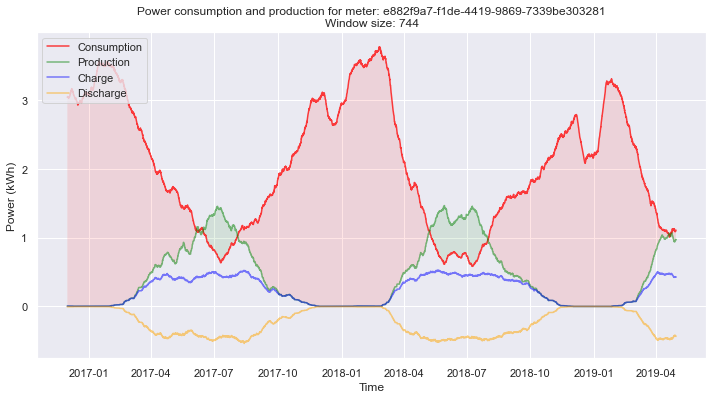

In [20]:
window_size = 24*31

series_battery["num_kwh_cons_ma"] = moving_average(series_battery["num_kwh_cons"], window=window_size)
series_battery["num_kwh_prod_ma"] = moving_average(series_battery["num_kwh_prod"], window=window_size)
series_battery["charge_ma"] = moving_average(series_battery["charge"], window=window_size)
series_battery["discharge_ma"] = moving_average(series_battery["discharge"], window=window_size)

sns.set()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_battery["timeslot"], series_battery["num_kwh_cons_ma"], label="Consumption", color="red", alpha=0.75)
ax.plot(series_battery["timeslot"], series_battery["num_kwh_prod_ma"], label="Production", color="green", alpha=0.5)
# ax.plot(series_battery["timeslot"], series_battery["surplus_deficit"], label="Surplus Deficit", alpha=0.75)

# Fill between positive
# ax.fill_between(series_merge["timeslot"], 0, series_merge["num_kwh_cons_ma"], where=series_merge["num_kwh_cons_ma"] >= 0, facecolor="green", alpha=0.5)
ax.fill_between(series_battery["timeslot"], series_battery["num_kwh_cons_ma"], series_battery["num_kwh_prod_ma"], where=series_battery["num_kwh_prod_ma"]>series_battery["num_kwh_cons_ma"], facecolor='green', alpha=0.1)
ax.fill_between(series_battery["timeslot"], series_battery["num_kwh_cons_ma"], series_battery["num_kwh_prod_ma"], where=series_battery["num_kwh_prod_ma"]<series_battery["num_kwh_cons_ma"], facecolor='red', alpha=0.1)

# x-axis label
ax.set_xlabel("Time")
# y-axis label
ax.set_ylabel("Power (kWh)")

# plot title    
ax.set_title("Power consumption and production for meter: " + meter_id + "\n" + "Window size: " + str(window_size))

# plot battery.charge_list as bar plot
# fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_battery["timeslot"], series_battery["charge_ma"], label="Charge", color="blue", alpha=0.5)
ax.plot(series_battery["timeslot"], series_battery["discharge_ma"], label="Discharge", color="orange", alpha=0.5)

# show legend
ax.legend(loc="upper left")

plt.savefig("figures/results/prod-cons-plot-simple-logic.png")

plt.show()

# Price optimisation

Define logic and battery

In [21]:
# Initialise battery
battery = Battery(max_capacity=13)

# Define logic 
def price_optimisation_logic(row, battery):

    power_yield = row["power_yield"]
    hour = row["timeslot"].hour
    deficit = power_yield < 0


    # If production
    if power_yield >= 0:
        # Charge battery with surplus
        battery.charge(power_yield)


    # If we are in peak hours
    if hour in peak_hours:
        # Discharge battery if deficit
        if deficit:
            battery.charge(power_yield)
    else: 

        # Initialise power_to_buy to 0
        power_to_buy = 0
        # If battery is not fully charged 
        if battery.get_current_capacity() != battery.get_max_capacity():
            # Charge battery
            power_to_buy = battery.get_max_capacity() - battery.get_current_capacity()
            battery.charge(power_to_buy) 


        if deficit: 
            if deficit:
                battery.surplus_deficit = -power_to_buy + power_yield
            else: 
                battery.surplus_deficit = -power_to_buy


    row["surplus_deficit"] = battery.get_surplus_deficit()
    row["battery_capacity"] = battery.get_current_capacity()
    row["charge"] = battery.charge_list[-1]
    row["discharge"] = battery.discharge_list[-1]

    return row

In [22]:
series_battery_logic_PO = logic_rollout(series_merge.copy(), battery, price_optimisation_logic, get_price)

Print price summary

In [23]:
avg_yearly_cost_dict["Price optimisation"] = (print_price_summary(series_battery_logic_PO), sum(battery.charge_list), sum(battery.discharge_list))

Cost for period: 2016-11-14 23:00:00+00:00 to 2019-05-14 21:00:00+00:00 is:  34665.0  NOK without VAT
Average cost per year is: 13900.0 NOK without VAT
Number of kwh purchased in the period: 44924.897
Average number of kwh purchased per year: 18013.52333281493
Average number of kwh sold per year: 3810.029107218004


Plot  

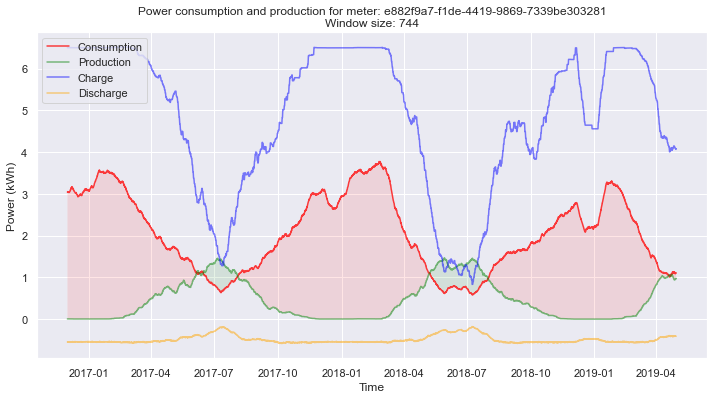

In [95]:
# Smooth data
window_size = 24*31

series_battery_logic_PO["num_kwh_cons_ma"] = moving_average(series_battery_logic_PO["num_kwh_cons"], window=window_size)
series_battery_logic_PO["num_kwh_prod_ma"] = moving_average(series_battery_logic_PO["num_kwh_prod"], window=window_size)
series_battery_logic_PO["charge_ma"] = moving_average(series_battery_logic_PO["charge"], window=window_size)
series_battery_logic_PO["discharge_ma"] = moving_average(series_battery_logic_PO["discharge"], window=window_size)

# num_kwh_cons_ma = moving_average(series_merge["num_kwh_cons"], window=24)
sns.set()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_battery_logic_PO["timeslot"], series_battery_logic_PO["num_kwh_cons_ma"], label="Consumption", color="red", alpha=0.75)
ax.plot(series_battery_logic_PO["timeslot"], series_battery_logic_PO["num_kwh_prod_ma"], label="Production", color="green", alpha=0.5)
# ax.plot(series_battery["timeslot"], series_battery["surplus_deficit"], label="Surplus Deficit", alpha=0.75)

# Fill between positive
# ax.fill_between(series_merge["timeslot"], 0, series_merge["num_kwh_cons_ma"], where=series_merge["num_kwh_cons_ma"] >= 0, facecolor="green", alpha=0.5)
ax.fill_between(series_battery_logic_PO["timeslot"], series_battery_logic_PO["num_kwh_cons_ma"], series_battery_logic_PO["num_kwh_prod_ma"], where=series_battery_logic_PO["num_kwh_prod_ma"]>series_battery_logic_PO["num_kwh_cons_ma"], facecolor='green', alpha=0.1)
ax.fill_between(series_battery_logic_PO["timeslot"], series_battery_logic_PO["num_kwh_cons_ma"], series_battery_logic_PO["num_kwh_prod_ma"], where=series_battery_logic_PO["num_kwh_prod_ma"]<series_battery_logic_PO["num_kwh_cons_ma"], facecolor='red', alpha=0.1)

# x-axis label
ax.set_xlabel("Time")
# y-axis label
ax.set_ylabel("Power (kWh)")

# plot title    
ax.set_title("Power consumption and production for meter: " + meter_id + "\n" + "Window size: " + str(window_size))

# plot battery.charge_list as bar plot
# fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_battery_logic_PO["timeslot"], series_battery_logic_PO["charge_ma"], label="Charge", color="blue", alpha=0.5)
ax.plot(series_battery_logic_PO["timeslot"], series_battery_logic_PO["discharge_ma"], label="Discharge", color="orange", alpha=0.5)

# show legend
ax.legend(loc="upper left")

plt.savefig("figures/results/prod-cons-plot-price-optim.png")

plt.show()

# DP Results

In [48]:
def get_price_DP(demand, type, timestamp):
    if type == "buy":
        return demand * hour_lookup_price[str(358 if timestamp.dayofyear >= 359 else timestamp.dayofyear)][str(timestamp.hour)]
    else:
        return demand * hour_lookup_price[str(358 if timestamp.dayofyear >= 359 else timestamp.dayofyear)][str(timestamp.hour)]*0.1

In [90]:
# load data/actions_small_graph_new_meter_id.txt

# load the DP trajectory
actions = pd.read_csv("data/actions_small_graph_new_meter_id.txt", sep=";", header=0, index_col=0)

with open("data/actions_small_graph_new_meter_id.txt", "r") as f:
    actions = f.read()

actions = literal_eval(actions)

buy_actions = np.array([action[0] for action in actions])
sell_actions = np.array([action[1] for action in actions])
yield_actions = np.array([action[2] for action in actions])

buy_price = np.array([get_price_DP(buy_actions[i], "buy", series_merge["timeslot"].iloc[i]) for i in range(len(buy_actions))])
sell_price = np.array([get_price_DP(sell_actions[i], "sell", series_merge["timeslot"].iloc[i]) for i in range(len(buy_actions))])

DP_price_list = buy_price + sell_price
# cumsum of price_list
DP_price_list_cumsum = np.cumsum(DP_price_list)


# Get years timedelt 
end = series_merge["timeslot"].iloc[-1]
start = series_merge["timeslot"].iloc[0]
time_delta_seconds =  (end-start).total_seconds()
years_timedelta = time_delta_seconds/(365.25*24*60*60)

# Calculate average price for DP
dp_avg_price = (sum(buy_price)-sum(sell_price))/years_timedelta

# Calculate charge
charge = (buy_actions - sell_actions) + yield_actions

# clip charge to 0
dp_charge_list = np.clip(charge, 0, None)
dp_discharge_list = np.clip(charge, None, 0)

# dp_discharge_list = charge[charge < 0]
# dp_charge_list = charge[charge > 0]

dp_charge = charge.sum()/years_timedelta
dp_discharge = discharge.sum()/years_timedelta

dp_buy_sum = buy_price.sum()/years_timedelta
dp_sell_sum = sell_price.sum()/years_timedelta

dp_price_sum = DP_price_list.sum()/years_timedelta


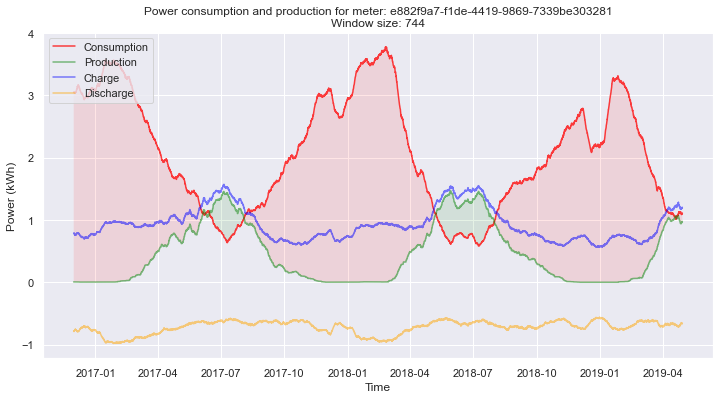

In [94]:
# Smooth data
window_size = 24*31


series_battery_DP_cons_ma = moving_average(pd.Series(series_merge["num_kwh_cons"]), window=window_size)
series_battery_DP_prod_ma = moving_average(pd.Series(series_merge["num_kwh_prod"]), window=window_size)
series_battery_charge_ma = moving_average(pd.Series(dp_charge_list), window=window_size)
series_battery_DP_discharge_ma = moving_average(pd.Series(dp_discharge_list), window=window_size)

# num_kwh_cons_ma = moving_average(series_merge["num_kwh_cons"], window=24)
sns.set()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_merge["timeslot"], series_battery_DP_cons_ma, label="Consumption", color="red", alpha=0.75)
ax.plot(series_merge["timeslot"], series_battery_DP_prod_ma, label="Production", color="green", alpha=0.5)
# ax.plot(series_battery["timeslot"], series_battery["surplus_deficit"], label="Surplus Deficit", alpha=0.75)

# Fill between positive
# ax.fill_between(series_merge["timeslot"], 0, series_merge["num_kwh_cons_ma"], where=series_merge["num_kwh_cons_ma"] >= 0, facecolor="green", alpha=0.5)
ax.fill_between(series_merge["timeslot"], series_battery_DP_cons_ma, series_battery_DP_prod_ma, where=series_battery_DP_prod_ma>series_battery_DP_cons_ma, facecolor='green', alpha=0.1)
ax.fill_between(series_merge["timeslot"], series_battery_DP_cons_ma, series_battery_DP_prod_ma, where=series_battery_DP_prod_ma<series_battery_DP_cons_ma, facecolor='red', alpha=0.1)

# x-axis label
ax.set_xlabel("Time")
# y-axis label
ax.set_ylabel("Power (kWh)")

# plot title    
ax.set_title("Power consumption and production for meter: " + meter_id + "\n" + "Window size: " + str(window_size))

# plot battery.charge_list as bar plot
# fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_merge["timeslot"], series_battery_charge_ma, label="Charge", color="blue", alpha=0.5)
ax.plot(series_merge["timeslot"], series_battery_DP_discharge_ma, label="Discharge", color="orange", alpha=0.5)

# show legend
ax.legend(loc="upper left")

plt.savefig("figures/results/prod-cons-plot-dp.png")

plt.show()

# Plot cummulative price 

In [96]:
series_list = {"No battery": series_no_battery, "Simple logic": series_battery, "Price optimisation": series_battery_logic_PO}

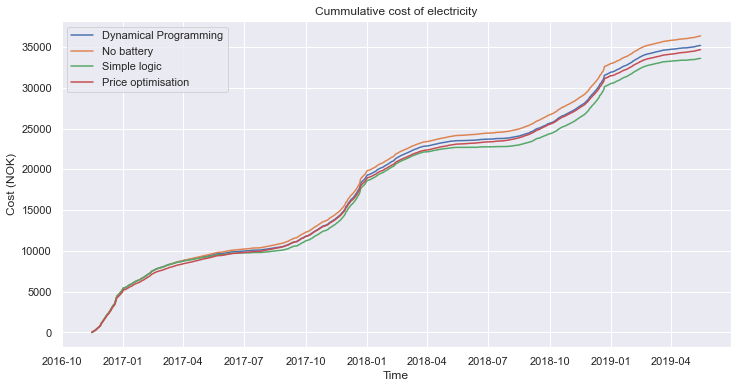

In [97]:
# plot cummulative price
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(series_merge["timeslot"], DP_price_list_cumsum, label="Dynamical Programming")


for name, series in series_list.items():
    ax.plot(series["timeslot"], series["price_cummulative"], label=name)

ax.set_xlabel('Time')
ax.set_ylabel('Cost (NOK)')
ax.set_title('Cummulative cost of electricity')

ax.legend()

plt.savefig("figures/results/cum-sum-cost-plot.png")

plt.show()


## Savings percentage barplot

{'No battery': 0.0, 'Simple logic': 7.559031403380287, 'Price optimisation': 4.621562952760514, 'Dynamical Programming': 3.8928259297677807}


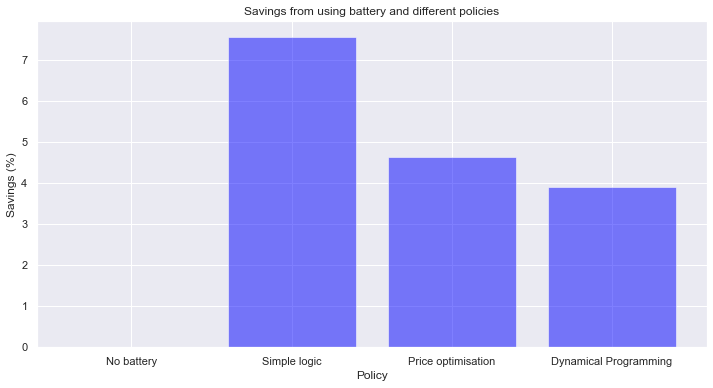

In [98]:

savings_percentage_dict = {}


# Create a savings percentage dictionary
for name, series in series_list.items():

    
    start = series["timeslot"].iloc[0] 
    end = series["timeslot"].iloc[-1] 


    time_delta_seconds =  (end-start).total_seconds()
    years_timedelta = time_delta_seconds/(365.25*24*60*60)


    series_price_sum = series["price"].sum()/years_timedelta
    series_no_battery_price_sum = series_no_battery["price"].sum()/years_timedelta
    savings_percentage = ((series_no_battery_price_sum-series_price_sum)/series_no_battery_price_sum)*100
    savings_percentage_dict[name] = savings_percentage


savings_percentage_DP = ((series_no_battery_price_sum-dp_avg_price)/series_no_battery_price_sum)*100
savings_percentage_dict["Dynamical Programming"] = savings_percentage_DP
print(savings_percentage_dict)

# plot barplot of savings_percentage_dict
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(list(savings_percentage_dict.keys()), list(savings_percentage_dict.values()), color="blue", alpha=0.5)
ax.set_xlabel('Policy')
ax.set_ylabel('Savings (%)')
ax.set_title('Savings from using battery and different policies')
# save plot to file
plt.savefig("figures/results/results/savings-percentages.png")
plt.show()


# Create table with price summary

In [99]:
# cols = ["Consumption", "Production", "kWh used", "charge", "discharge", "savings"]
cols = ["Cons. (kWh)", "Prod. (kWh)", "Cost (NOK)", "Bought (kWh)", "Sold (kWh)", "Savings (%)", "Charge (kWh)", "Discharge (kWh)"]
# Create dataframe with columns
df = pd.DataFrame(columns=cols)

for name, series in series_list.items():

    start = series["timeslot"].iloc[0] 
    end = series["timeslot"].iloc[-1] 


    time_delta_seconds =  (end-start).total_seconds()
    years_timedelta = time_delta_seconds/(365.25*24*60*60)



    ycons = round(series["num_kwh_cons"].sum()/years_timedelta,2)
    yprod = round(series["num_kwh_prod"].sum()/years_timedelta,2)
    savings_percent = round(savings_percentage_dict[name],2)

    avg_charge = round(avg_yearly_cost_dict[name][1]/years_timedelta,2)
    avg_discharge= round(avg_yearly_cost_dict[name][2]/years_timedelta,2)

    df.loc[name] = [ycons, yprod, round(avg_yearly_cost_dict[name][0][0],2), round(avg_yearly_cost_dict[name][0][1],2), round(avg_yearly_cost_dict[name][0][2],2), savings_percent, avg_charge, avg_discharge]


df.loc["Dynamical programming"] = [ycons, yprod, round(dp_price_sum,2), round(dp_buy_sum,2), round(dp_sell_sum,2), round(savings_percentage_DP,2), round(dp_charge,2), round(dp_discharge,2)]

print(df.to_latex())




\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Cons. (kWh) &  Prod. (kWh) &  Cost (NOK) &  Bought (kWh) &  Sold (kWh) &  Savings (\%) &  Charge (kWh) &  Discharge (kWh) \\
\midrule
No battery            &     18176.94 &      3922.92 &     14573.0 &      18176.94 &     3922.92 &         0.00 &          0.00 &             0.00 \\
Simple logic          &     18176.94 &      3922.92 &     13472.0 &      16159.58 &     1905.56 &         7.56 &       2017.36 &         -2017.36 \\
Price optimisation    &     18176.94 &      3922.92 &     13900.0 &      18013.52 &     3810.03 &         4.62 &       4299.28 &         -4294.07 \\
Dynamical programming &     18176.94 &      3922.92 &     14105.0 &      14055.50 &       49.50 &         3.89 &       1862.10 &         -6307.25 \\
\bottomrule
\end{tabular}



C:\Users\andre\AppData\Local\Temp\ipykernel_21704\3806871060.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [ ]:
avg_yearly_cost_dict

{'No battery': ((14573.0, 18176.938541853444, 3922.922131643948), 0, 0),
 'Simple logic': ((13472.0, 16159.57928990943, 1905.562879699936),
  5031.200999999994,
  -5031.201000000005),
 'Price optimisation': ((13900.0, 18013.52333281493, 3810.029107218004),
  10722.210000000008,
  -10709.209999999995)}

# Rolling window with forecast
Define chunks function

In [ ]:
def chunks(df, n):
    """Make chunks 

    Args:
        df (DataFrame): pandas dataframe to split into chunks
        n (int): chunk size

    Yields:
        DataFrame: Chunks of dataframe
    """
    for i in range(0, df.shape[0], n):
        yield df.iloc[i:i + n]

Load data and set timestamp index

In [ ]:
# load RF_prediction_consumption.csv
RF_prediction_consumption = pd.read_csv("data/RF_prediction_consumption.csv")
RF_prediction_production = pd.read_csv("data/RF_prediction_production.csv")

# Convert to datetime
RF_prediction_consumption.index = pd.to_datetime(RF_prediction_consumption["timeslot"], utc = True)
RF_prediction_production.index = pd.to_datetime(RF_prediction_production["timeslot"], utc = True)

# sort by index
RF_prediction_consumption = RF_prediction_consumption.sort_index()
RF_prediction_production = RF_prediction_production.sort_index()

Load the original data

In [ ]:
orig_data = series_merge.copy()
orig_data.index = pd.to_datetime(orig_data["timeslot"], utc = True)

# drop columns from orig_data
orig_data = orig_data.drop(["num_kwh_cons_ma", "num_kwh_prod_ma", "timeslot"], axis=1)
orig_data.columns = ["num_kwh_prod_orig", "num_kwh_cons_orig", "power_yield_orig"]


Merge all the data into one dataframe

In [ ]:
# Merge RF_prediction_consumption and RF_prediction_production
RF_prediction_consumption_and_production = RF_prediction_consumption.merge(RF_prediction_production, how="inner", left_index=True, right_index=True)


RF_prediction_consumption_and_production.columns = ["timeslot_cons", "pred_cons", "lower_bound_cons", "upper_bound_cons", "timeslot_prod", "pred_prod", "lower_bound_prod", "upper_bound_prod"]
# drop timeslot 
RF_prediction_consumption_and_production.drop(["timeslot_cons", "timeslot_prod"], axis=1, inplace=True)

# Merge with series_merge
RF_prediction_consumption_and_production = RF_prediction_consumption_and_production.merge(orig_data, how="inner", left_index=True, right_index=True)
# RF_prediction_consumption_and_production_and_series_merge


# Add column called power_yield with the difference between prod and cons
RF_prediction_consumption_and_production["power_yield"] = RF_prediction_consumption_and_production["pred_prod"] - RF_prediction_consumption_and_production["pred_cons"]
# add column current index as timeslot and reset index
RF_prediction_consumption_and_production["timeslot"] = RF_prediction_consumption_and_production.index
RF_prediction_consumption_and_production = RF_prediction_consumption_and_production.reset_index(drop=True)

RF_prediction_consumption_and_production.head()

,pred_cons,lower_bound_cons,upper_bound_cons,pred_prod,lower_bound_prod,upper_bound_prod,num_kwh_prod_orig,num_kwh_cons_orig,power_yield_orig,power_yield,timeslot
0,0.055218,0.015114,0.114701,0.000444,-0.023711,0.047452,0.0,1.0,-1.0,-0.054774,2017-09-04 22:00:00+00:00
1,0.060391,0.000900,0.109158,0.000444,-0.022775,0.044722,0.0,1.0,-1.0,-0.059947,2017-09-04 23:00:00+00:00
2,0.048054,-0.004446,0.104350,0.000444,-0.023344,0.053240,0.0,1.0,-1.0,-0.047610,2017-09-05 00:00:00+00:00
3,0.050401,-0.001684,0.096851,0.000444,-0.017118,0.043948,0.0,1.0,-1.0,-0.049957,2017-09-05 01:00:00+00:00
4,0.048071,-0.002628,0.110221,0.000444,-0.016349,0.055556,0.0,1.0,-1.0,-0.047627,2017-09-05 02:00:00+00:00


Plot data to verify

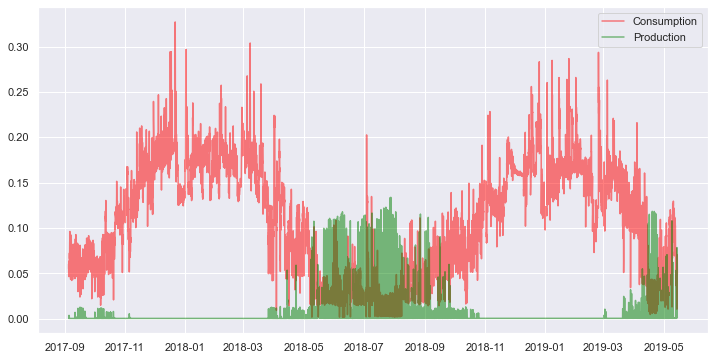

In [ ]:
# Plot consumption and production
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(RF_prediction_consumption_and_production["timeslot"], RF_prediction_consumption_and_production["pred_cons"], label="Consumption", color="red", alpha=0.5)
ax.plot(RF_prediction_consumption_and_production["timeslot"], RF_prediction_consumption_and_production["pred_prod"], label="Production", color="green", alpha=0.5)
#legends
ax.legend()
plt.show()


Loop through the 24 hour chunks and find the best logic to use. Calculate cost with this logic for the original data
Also, find the best policy to use based on the original data (assuming our prediction is 100% correct)

In [ ]:

# Define battery with capcacity 0, same as no battery
# no_battery = Battery(0)
battery_simple_logic = Battery(12)
battery_TO_logic = Battery(12)
battery_simple_logic_orig = Battery(12)
battery_TO_logic_orig = Battery(12)

battery_orig = Battery(12)

i = 0

best_choice = []
best_choice_orig = []
real_cost = []
real_cost_orig = []
for chunk in chunks(RF_prediction_consumption_and_production, 24):
    orig_data = chunk[["num_kwh_prod_orig", "num_kwh_cons_orig", "power_yield_orig", "timeslot"]].copy()
    orig_data.columns = ["num_kwh_prod", "num_kwh_cons", "power_yield", "timeslot"]

    # rollout_series_no_battery = logic_rollout(chunk.copy(), no_battery, logic, get_price)
    rollout_series_simple_logic = logic_rollout(chunk.copy(), battery_simple_logic, logic, get_price)
    rollout_series_logic_TO = logic_rollout(chunk.copy(), battery_TO_logic, price_optimisation_logic, get_price)


    rollout_series_simple_logic_orig = logic_rollout(orig_data.copy(), battery_simple_logic_orig, logic, get_price)
    rollout_series_logic_TO_orig = logic_rollout(orig_data.copy(), battery_TO_logic_orig, price_optimisation_logic, get_price)

    # get price summary
    # price_summary_no_battery = rollout_series_no_battery["price"].sum()
    price_summary_simple_logic = rollout_series_simple_logic["price"].sum()
    price_summary_simple_logic_TO = rollout_series_logic_TO["price"].sum()
    
    price_summary_simple_logic_orig = rollout_series_simple_logic_orig["price"].sum()
    price_summary_simple_logic_TO_orig = rollout_series_logic_TO_orig["price"].sum()

    # print(np.argmin([price_summary_simple_logic, price_summary_simple_logic_TO]))
    # print(price_summary_simple_logic, price_summary_simple_logic_TO)
    best = np.argmin([price_summary_simple_logic, price_summary_simple_logic_TO])
    best_choice.append(best)

    best_orig = np.argmin([price_summary_simple_logic_orig, price_summary_simple_logic_TO_orig])
    best_choice_orig.append(best_orig)

    if best == 0:
        rollout = logic_rollout(orig_data.copy(), battery_orig, logic, get_price)
        # print(rollout)
        # print(chunk)

        real_cost.append(rollout["price"].sum())
    elif best == 1:
        rollout = logic_rollout(orig_data.copy(), battery_orig, price_optimisation_logic, get_price)
        # print(rollout)
        # print(chunk)
        # rollout_series_simple_logic["price"].sum()
        real_cost.append(rollout["price"].sum())


    if best_orig == 0:
        real_cost_orig.append(price_summary_simple_logic_orig)
    elif best_orig == 1:
        real_cost_orig.append(price_summary_simple_logic_TO_orig)


    # break
    i += 1 
    if i % 100 == 0:
        print("Iteration: ", i)

KeyboardInterrupt: 

Compare decisions from the original data and the predicted data

In [ ]:
# Convert best and best_orig to numpy arrays
best_choice = np.array(best_choice)
best_choice_orig = np.array(best_choice_orig)

# compare values at same index
best_choice == best_choice_orig

print(sum(best_choice == best_choice_orig)/len(best_choice)*100, "percent agreement")


81.19935170178282 percent agreement


Calculate yearly cost to compare

In [ ]:
start, end = RF_prediction_consumption_and_production["timeslot"].iloc[0], RF_prediction_consumption_and_production["timeslot"].iloc[-1]
time_delta_seconds =  (end-start).total_seconds()
years_timedelta = time_delta_seconds/(365.25*24*60*60)
# The yealy cost using the predictions is 
print("Yearly cost using predictions:", sum(real_cost)/years_timedelta, "NOK/year")
print("Yearly cost using real data:", sum(real_cost_orig)/years_timedelta, "NOK/year")

Yearly cost using predictions: 13675.040455147566 NOK/year
Yearly cost using real data: 13354.731868014851 NOK/year
